In [1]:
#The goal of this report is to practice and develop Exploratory Data Analysis(EDA) skills in Python. 
#The content of report consists summary analysis on correlation of world happiness and 6 factors, and the world happiness trend during last five years period.
#Call required libraries
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

In [2]:
w_15 = pd.read_csv("C:/Users/alex/Documents/worldhappinessreport/2015.csv")
w_16 = pd.read_csv("C:/Users/alex/Documents/worldhappinessreport/2016.csv")
w_17 = pd.read_csv("C:/Users/alex/Documents/worldhappinessreport/2017.csv")
w_18 = pd.read_csv("C:/Users/alex/Documents/worldhappinessreport/2018.csv")
w_19 = pd.read_csv("C:/Users/alex/Documents/worldhappinessreport/2019.csv")

In [3]:
w_15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
w_15 = w_15[["Country","Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]]
w_15

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [5]:
print("Dimension of dataset: w_15.shape")
w_15.dtypes

Dimension of dataset: w_15.shape


Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
dtype: object

In [6]:
w_15 = w_15.rename(columns = {'Country':'country','Happiness Score':'score','Economy (GDP per Capita)':'gdp',
                       'Family':'socsupport','Health (Life Expectancy)':'lexp',
                       'Freedom':'freedom','Generosity':'generosity','Trust (Government Corruption)':'trust'}) 


In [7]:
w_15['year'] = 2015 
w_15

,country,score,gdp,socsupport,lexp,freedom,generosity,trust,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015
154,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015
155,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2015
156,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015


In [8]:
w_16 = w_16[["Country","Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]]
w_16 = w_16.rename(columns = {'Country':'country','Happiness Score':'score','Economy (GDP per Capita)':'gdp','Family':'socsupport','Health (Life Expectancy)':'lexp','Freedom':'freedom','Generosity':'generosity','Trust (Government Corruption)':'trust'}) 
w_16['year'] = 2016
w_16

,country,score,gdp,socsupport,lexp,freedom,generosity,trust,year
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2016
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2016
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2016
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2016
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2016
...,...,...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2016
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2016
154,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587,2016
155,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.48397,0.17233,2016


In [9]:
w_17 = w_17[["Country","Happiness.Score", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption."]]
w_17 = w_17.rename(columns = {'Country':'country','Happiness.Score':'score','Economy..GDP.per.Capita.':'gdp','Family':'socsupport','Health..Life.Expectancy.':'lexp','Freedom':'freedom','Generosity':'generosity','Trust..Government.Corruption.':'trust'}) 
w_17['year'] = 2017
w_17

,country,score,gdp,socsupport,lexp,freedom,generosity,trust,year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...
150,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,2017
151,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,2017
152,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2017
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2017


In [10]:
w_18 = w_18[["Country or region","Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
w_18 = w_18.rename(columns = {'Country or region':'country','Score':'score','GDP per capita':'gdp','Social support':'socsupport','Healthy life expectancy':'lexp','Freedom to make life choices':'freedom','Generosity':'generosity','Perceptions of corruption':'trust'}) 
w_18['year'] = 2018
w_18.loc[ w_18["country"]=="United Arab Emirates" , "gdp"] = 1.467
w_18.loc[ w_18["country"]=="United Arab Emirates" , "socsupport"] = 1.296
w_18.loc[ w_18["country"]=="United Arab Emirates" , "trust"] = 0.186
w_18.loc[ w_18["country"]=="United Arab Emirates" , "lexp"] = 0.776
w_18.loc[ w_18["country"]=="United Arab Emirates" , "freedom"] = 0.67
w_18.loc[ w_18["country"]=="United Arab Emirates" , "generosity"] = 0.284
w_18[w_18["country"]=="United Arab Emirates"]
#United Arab Emirates",6.774,1.467,1.296,0.776,0.670,0.284,0.186,2018

,country,score,gdp,socsupport,lexp,freedom,generosity,trust,year
19,United Arab Emirates,6.774,1.467,1.296,0.776,0.67,0.284,0.186,2018


In [11]:
#replace country's positions of United Kingdom and Israel
w_18 = w_18.replace(regex={r'United Kingdom': 'Israel', 'Israel': 'United Kingdom'})
w_18[w_18["country"]=="United Kingdom"]

,country,score,gdp,socsupport,lexp,freedom,generosity,trust,year
18,United Kingdom,6.814,1.301,1.559,0.883,0.533,0.354,0.272,2018


In [12]:
w_19 = w_19[["Country or region","Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
w_19 = w_19.rename(columns = {'Country or region':'country','Score':'score','GDP per capita':'gdp','Social support':'socsupport','Healthy life expectancy':'lexp','Freedom to make life choices':'freedom','Generosity':'generosity','Perceptions of corruption':'trust'}) 
w_19['year'] = 2019
w_19

,country,score,gdp,socsupport,lexp,freedom,generosity,trust,year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [13]:
#make four countries names consistant 
w_17 = w_17.replace(regex={r'Taiwan Province of China': 'Taiwan', 'Hong Kong S.A.R., China': 'Hong Kong'})
w_18 = w_18.replace(regex={r'Trinidad & Tobago': 'Trinidad and Tobago', 'Northern Cyprus': 'North Cyprus'})
w_19 = w_19.replace(regex={r'Trinidad & Tobago': 'Trinidad and Tobago', 'Northern Cyprus': 'North Cyprus'})

In [14]:
#Combine the 5 datasets to a new dataset
w = pd.concat([w_15,w_16,w_17,w_18,w_19],sort=True)
w

,country,freedom,gdp,generosity,lexp,score,socsupport,trust,year
0,Switzerland,0.66557,1.39651,0.29678,0.94143,7.587,1.34951,0.41978,2015
1,Iceland,0.62877,1.30232,0.43630,0.94784,7.561,1.40223,0.14145,2015
2,Denmark,0.64938,1.32548,0.34139,0.87464,7.527,1.36058,0.48357,2015
3,Norway,0.66973,1.45900,0.34699,0.88521,7.522,1.33095,0.36503,2015
4,Canada,0.63297,1.32629,0.45811,0.90563,7.427,1.32261,0.32957,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,0.55500,0.35900,0.21700,0.61400,3.334,0.71100,0.41100,2019
152,Tanzania,0.41700,0.47600,0.27600,0.49900,3.231,0.88500,0.14700,2019
153,Afghanistan,0.00000,0.35000,0.15800,0.36100,3.203,0.51700,0.02500,2019
154,Central African Republic,0.22500,0.02600,0.23500,0.10500,3.083,0.00000,0.03500,2019


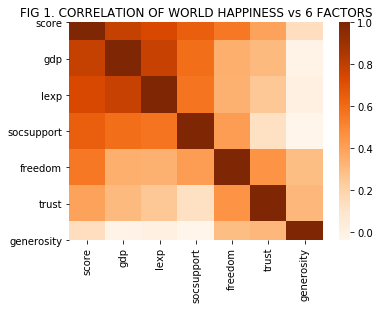

In [15]:
#Find out the correlation between score and 6 factors
w1 = w[['score','gdp','lexp','socsupport','freedom','trust','generosity']]
cor = w1.corr() #Calculate the correlation of the 6 variables
sns.heatmap(cor, square = True, cmap="Oranges") #Plot the correlation as heat map
plt.title('FIG 1. CORRELATION OF WORLD HAPPINESS vs 6 FACTORS')
plt.show()
#From this heat map, most relative factors with happiness score were Economy (GDP per Capita) and Health(Life Expectancy).

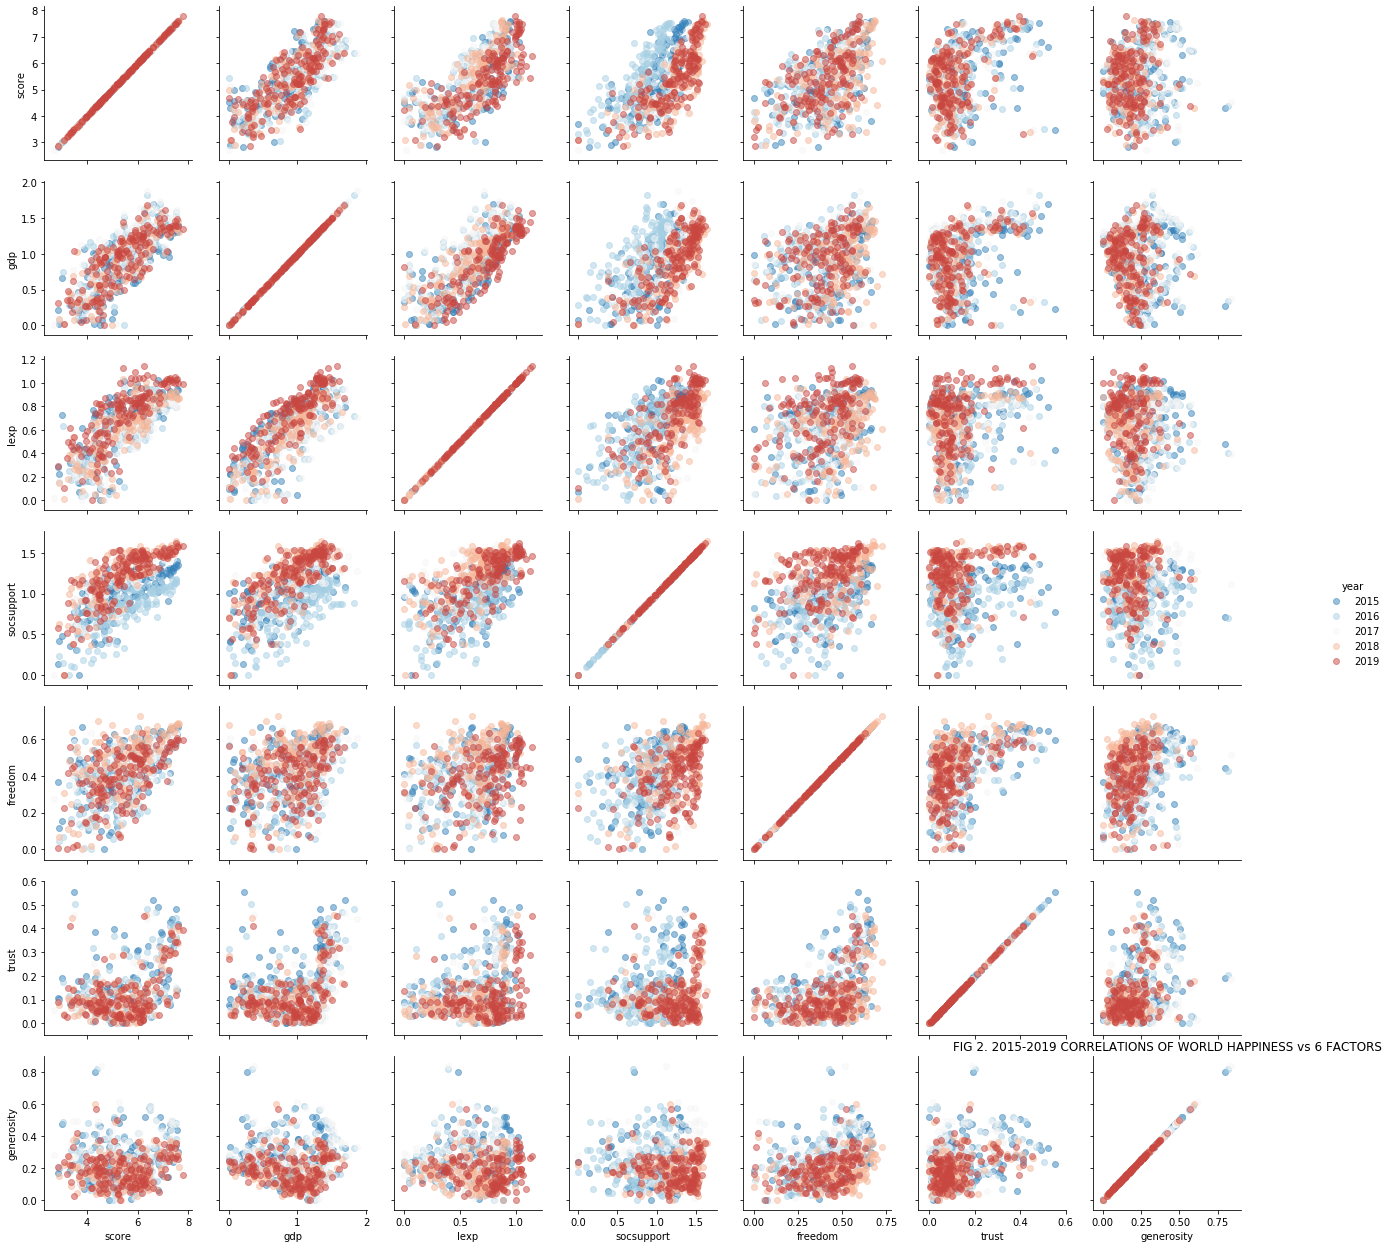

In [16]:
#Let's add year dimention and check the correlation
g = sns.PairGrid(w, vars=['score', 'gdp', 'lexp', 'socsupport','freedom','trust','generosity'],
                 hue='year', palette='RdBu_r')
g.map(plt.scatter, alpha=0.5)
g.add_legend()
plt.title('FIG 2. 2015-2019 CORRELATIONS OF WORLD HAPPINESS vs 6 FACTORS')
plt.show();

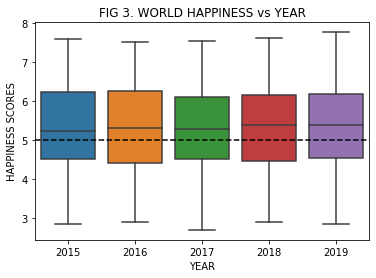

In [17]:
# Use box plot graphic to analyze the trend of World Happiness
b = sns.boxplot(x="year", y="score", data=w)
plt.xlabel('YEAR')
plt.ylabel('HAPPINESS SCORES')
plt.title('FIG 3. WORLD HAPPINESS vs YEAR')
plt.axhline(5, color="k", linestyle="--")
plt.show()
#If we define a country which has happiness score 5 was a happy country, there were much more happy countries than unhappy.
#The extent of happiness of the world had a little bit improvement throughout last five years.

In [ ]:
#Conclusions:
#1. Economy (GDP per Capita) and Health(Life Expectancy), this two factors, had most strong relationship with World Happiness.
#2. In generally, much more countries felt happy than not happy. The limit of this analysis was to ignore the huge population difference among countries.So we could not say that the number of happy people was more than unhappy people.